# Multimodal analysis on LEAP3: FA deviations, clinical symptoms and polygenic risk

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels 

### Load data

In [2]:
# The source directory
data_dir = '/home/preclineu/ramcir/Desktop/Clinical/data/'

# The IDP file
idp_list = 'phenotypes_fa.txt'

# Read the IDPs list and store the names
with open(os.path.join(data_dir, idp_list)) as f:
    idp_ids = f.read().splitlines()

# Loading the data for analysis
df_leap3 = pd.read_pickle(os.path.join(data_dir, 'leap3_data_zscores.pkl'))

### Select data for analysis

In [3]:
# Define the selected symptom variables 
selected_symptoms = [
    "t1_adi_social_total",  # Social interaction deficits (ADI-R)
    "t1_adi_communication_total",  # Communication deficits (ADI-R)
    "t1_adi_rrb_total",  # Restricted & repetitive behaviors (ADI-R)
    "t1_css_total",  # Overall autism severity (Calibrated Severity Score)
    "t1_sa_css",  # Social Affect severity (Calibrated Severity Score)
    "t1_rrb_css",  # Restricted & Repetitive Behaviors severity (Calibrated Severity Score)
    "t1_srs_tscore_combined",  # Social responsiveness difficulties (SRS Total Score)
    "t1_adhd_inattentiv_parent",  # Parent-reported inattention symptoms (ADHD)
    "t1_adhd_hyperimpul_parent",  # Parent-reported hyperactivity/impulsivity symptoms (ADHD)
    "t1_rbs_total",  # Total repetitive behaviors (Repetitive Behavior Scale-Revised, RBS-R)
    "t1_sdq_total_difficulties_p",  # Total behavioral difficulties (Strengths & Difficulties Questionnaire, SDQ)
    "t1_beck_anx_adulta_self",  # Self-reported anxiety (Beck Anxiety Inventory, BAI)
    "t1_beck_dep_adulta_self",  # Self-reported depression (Beck Depression Inventory, BDI)
    "t1_ssp_total",  # Total sensory processing difficulties (Short Sensory Profile, SSP)
    "t1_ssp_hype"  # Hyperresponsiveness to sensory stimuli (Sensory Processing Issue)
]

# Define the selected polygenic scores (PGS) 
selected_pgs = [
    "PGS_ASD_ipsych_Z",  # Autism Spectrum Disorder (ASD) genetic risk
    "PGS_ADHD_Z",  # Attention-Deficit/Hyperactivity Disorder (ADHD) genetic risk
    "PGS_Epilepsy_Z",  # Epilepsy risk (frequently comorbid with autism)
    "PGS_Intelligence_Z",  # General intelligence (cognitive variability in autism)
    "PGS_EQ_Z",  # Empathy quotient (lower scores linked to social cognition difficulties)
    "PGS_xDx_ipsych_Z",  # Cross-disorder psychiatric risk (shared genetic liability for ASD, ADHD, SZ, BD, MDD)
    "PGS_Neuroticism_Z"  # Neuroticism (emotional instability, relevant for anxiety & mood regulation)
]

# Extract the selected columns and keep index
leap3_symptoms = df_leap3[selected_symptoms].copy()
leap3_pgs = df_leap3[selected_pgs].copy()

### Correlation FA vs. symptom and FA vs. PGS

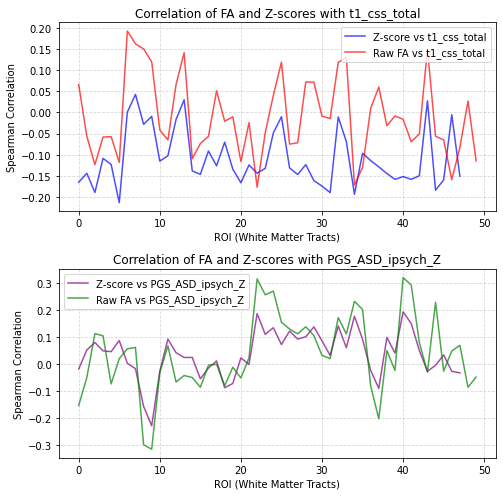

In [4]:
# Extract FA and Z-score column names
z_scores = [col for col in df_leap3.columns if col.startswith('Zscore')]  # Z-score FA
fa_values = [col for col in df_leap3.columns if col.startswith('FA')]  # Raw FA values

# Set 'id' as index for consistency
df = df_leap3.set_index('id')

# Specify the symptom and PGS score to correlate with
symptom = "t1_css_total"  
pgs_score = "PGS_ASD_ipsych_Z"  

# Initialize arrays for correlation results
p_values_z_symptom = np.zeros(len(z_scores))
r_values_z_symptom = np.zeros(len(z_scores))
p_values_fa_symptom = np.zeros(len(fa_values))
r_values_fa_symptom = np.zeros(len(fa_values))

p_values_z_pgs = np.zeros(len(z_scores))
r_values_z_pgs = np.zeros(len(z_scores))
p_values_fa_pgs = np.zeros(len(fa_values))
r_values_fa_pgs = np.zeros(len(fa_values))

# Compute Spearman correlations (Z-score FA vs. Symptom)
for i, idp in enumerate(z_scores):
    if symptom in df.columns:
        r_values_z_symptom[i], p_values_z_symptom[i] = stats.spearmanr(df[idp].dropna(), df[symptom].dropna())

# Compute Spearman correlations (Raw FA vs. Symptom)
for i, idp in enumerate(fa_values):
    if symptom in df.columns:
        r_values_fa_symptom[i], p_values_fa_symptom[i] = stats.spearmanr(df[idp].dropna(), df[symptom].dropna())

# Compute Spearman correlations (Z-score FA vs. PGS)
for i, idp in enumerate(z_scores):
    if pgs_score in df.columns:
        r_values_z_pgs[i], p_values_z_pgs[i] = stats.spearmanr(df[idp].dropna(), df[pgs_score].dropna())

# Compute Spearman correlations (Raw FA vs. PGS)
for i, idp in enumerate(fa_values):
    if pgs_score in df.columns:
        r_values_fa_pgs[i], p_values_fa_pgs[i] = stats.spearmanr(df[idp].dropna(), df[pgs_score].dropna())

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(7,7))

# Plot correlations with symptom
axes[0].plot(r_values_z_symptom, label=f'Z-score vs {symptom}', color='blue', alpha=0.7)
axes[0].plot(r_values_fa_symptom, label=f'Raw FA vs {symptom}', color='red', alpha=0.7)
axes[0].set_title(f"Correlation of FA and Z-scores with {symptom}")
axes[0].set_ylabel("Spearman Correlation")
axes[0].set_xlabel("ROI (White Matter Tracts)")
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)

# Plot correlations with PGS
axes[1].plot(r_values_z_pgs, label=f'Z-score vs {pgs_score}', color='purple', alpha=0.7)
axes[1].plot(r_values_fa_pgs, label=f'Raw FA vs {pgs_score}', color='green', alpha=0.7)
axes[1].set_title(f"Correlation of FA and Z-scores with {pgs_score}")
axes[1].set_ylabel("Spearman Correlation")
axes[1].set_xlabel("ROI (White Matter Tracts)")
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


## CCA analysis (msCCA)

### Initialize

In [9]:
# msCCA imports
sys.path.append(os.path.join(data_dir, 'saccade-main'))
from scca import MSCCA
from utils import deflate

# Define msCCA Parameters
l1 = [1, 0.4, 0.9]    # Adjusted sparsity for symptoms, FA, and PGS
niter = 1000          # Number of iterations
sign = [1, 0, 0]      # Sign constraints
rank = 3              # Number of components
n_views = 3           # Three data views: Symptoms, FA, PGS
n_splits = 50         # Number of cross-validation splits

# Create df_all with FA Z-scores, selected symptoms, and selected PGS scores
df_all = df_leap3[z_scores].join(df_leap3[selected_symptoms + selected_pgs + ['t1_sex', 't1_ageyrs']])
df_all = df_all.fillna(df_all.median()) # Fill missing data with median values

# Configure data matrix with three views
X = [
    df_all[selected_symptoms].to_numpy(),  # View 1: Symptoms
    df_all[z_scores].to_numpy(),  # View 2: FA (Z-score representation)
    df_all[selected_pgs].to_numpy()  # View 3: Polygenic scores (PGS)
]

# Initialize weights storage for visualization
W = [np.zeros((X[v].shape[1], rank, n_splits)) for v in range(n_views)]

# Initialize correlation result storage
R = np.zeros((n_splits, rank))
R_all = np.zeros((n_splits, n_views, rank))

In [13]:
def run_mscca(X, l1, niter, sign, rank, n_views, tr_frac):
    # initialise the weights (to store for visualisation)
    W = []
    for v in range(n_views):
        W.append( np.zeros((X[v].shape[1], rank)) )

    tr = np.random.uniform(size=X[0].shape[0]) < 0.7
    te = ~tr
       
    # standardize
    Xtr = []
    Xte = []
    for v in range(n_views):
        m = np.mean(X[v][tr,:], axis = 0)
        s = np.std(X[v][tr,:], axis = 0)
        Xtr.append( (X[v][tr,:] - m) / s )
        Xte.append( (X[v][te,:] - m) / s )
    
    Cm = MSCCA(n_components=rank, n_views=n_views)
    Cm.fit(Xtr, l1=l1, sign=sign, verbose=False)
    
    scores_te = Cm.transform(Xte)
    if np.isnan(scores_te).any():
        Cm.fit(Xtr, l1=l1, sign=sign, verbose=False)   

    # compute the canonical correlations
    R12 = np.zeros(rank)
    R13 = np.zeros(rank)
    R23 = np.zeros(rank) 
    R = np.zeros(rank)   
    for r in range(rank):
          R12[r] = np.corrcoef(scores_te[0][:,r].ravel(), scores_te[1][:,r].ravel())[0][1] 
          R13[r] = np.corrcoef(scores_te[0][:,r].ravel(), scores_te[2][:,r].ravel())[0][1] 
          # this is not included in the objective function
          R23[r] = np.corrcoef(scores_te[1][:,r].ravel(), scores_te[2][:,r].ravel())[0][1] 
          
          R[r] =  (R12[r] +  R13[r])/2
          
    # save the weights
    #for v in range(n_views):
    #    W[v][:,:] = Cm.W[v]

    return R, Cm, R12, R13, R23

### Run

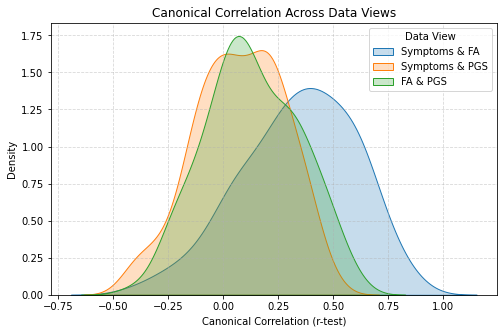

Overall Canonical Correlation: Mean = [0.24670763 0.26188232 0.11195639], Std = [0.14401459 0.16451176 0.19989195]


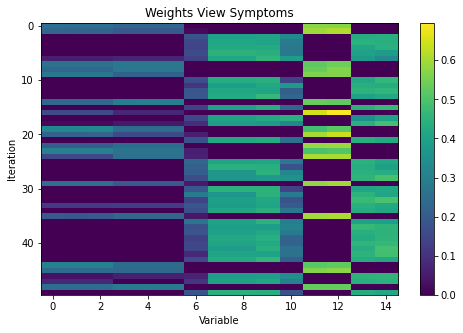

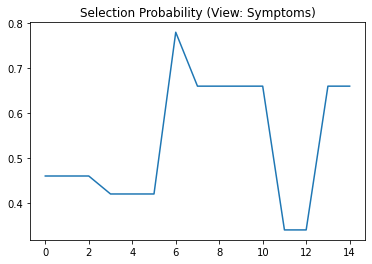


Stable Features in Symptoms:
t1_srs_tscore_combined


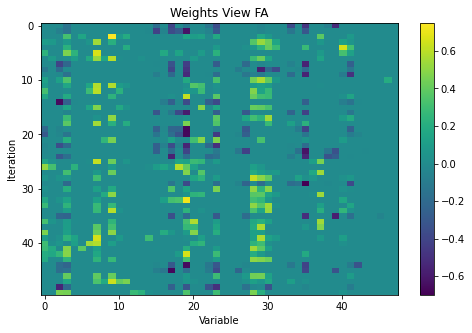

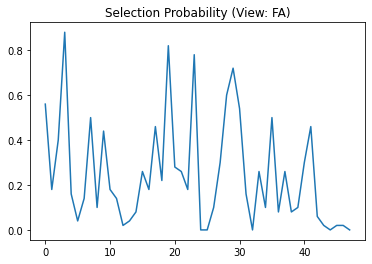


Stable Features in FA:
Zscore_FA_mean_of_Body_of_corpus_callosum
Zscore_FA_mean_of_Posterior_limb_of_internal_capsule_L
Zscore_FA_mean_of_Anterior_corona_radiata_L
Zscore_FA_mean_of_Posterior_thalamic_radiation_L


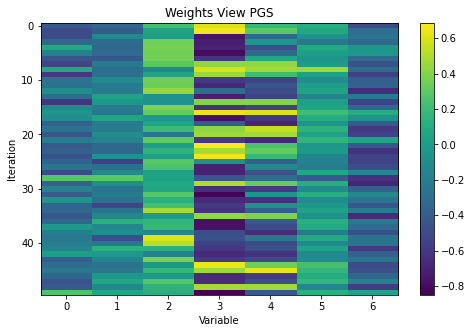

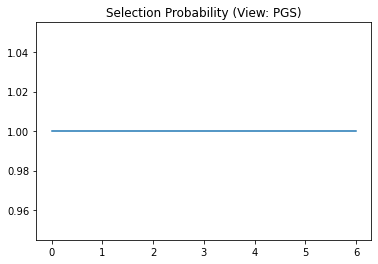


Stable Features in PGS:
PGS_ASD_ipsych_Z
PGS_ADHD_Z
PGS_Epilepsy_Z
PGS_Intelligence_Z
PGS_EQ_Z
PGS_xDx_ipsych_Z
PGS_Neuroticism_Z


In [136]:
# Visualization: Canonical Correlation Distributions
view_labels = ["Symptoms & FA", "Symptoms & PGS", "FA & PGS"]
plt.figure(figsize=(8, 5))
for i in range(3):  
    sns.kdeplot(R_all[:, i, :].flatten(), fill=True, label=view_labels[i])

plt.xlabel("Canonical Correlation (r-test)")
plt.ylabel("Density")
plt.title("Canonical Correlation Across Data Views")
plt.legend(title="Data View")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Print Summary Statistics
print(f"Overall Canonical Correlation: Mean = {np.mean(R, axis=0)}, Std = {np.std(R, axis=0)}")

# Plot Weights Using Stability Selection (Includes Symptoms, FA, PGS)
select_thresh = 0.7
view_names = ["Symptoms", "FA", "PGS"]

for i in range(n_views):
    plt.figure(figsize=(8, 5))
    plt.imshow(W[i][:, 0, :].T, aspect="auto")
    plt.colorbar()
    plt.title(f"Weights View {view_names[i]}")
    plt.xlabel("Variable")
    plt.ylabel("Iteration")
    plt.show()

    # Compute Selection Probability
    p_selection = np.sum(np.abs(W[i][:, 0, :]) > 0.0001, axis=1) / n_splits
    plt.plot(p_selection)
    plt.title(f"Selection Probability (View: {view_names[i]})")
    plt.show()

    print(f"\nStable Features in {view_names[i]}:")
    if i == 0:
        print("\n".join([selected_symptoms[j] for j in np.where(p_selection > select_thresh)[0]]))
    elif i == 1:
        print("\n".join([z_scores[j] for j in np.where(p_selection > select_thresh)[0]]))
    elif i == 2:
        print("\n".join([selected_pgs[j] for j in np.where(p_selection > select_thresh)[0]]))

In [ ]:
# Permutation Test for Statistical Significance
n_perm = 1000
r_true = np.mean(R, axis=0)  # Compute real canonical correlations

Xp = copy.deepcopy(X)  # Copy data for shuffling
R_perm = np.zeros((n_perm, rank))

for p in range(n_perm):
    print(f"Permutation {p}/{n_perm}")
    np.random.shuffle(Xp[0])  # Shuffle symptoms only (breaking structure)
    Rp = np.zeros((n_splits, rank))

    for i in range(n_splits):
        r, Cm, R12, R13, R23 = run_mscca(Xp, l1, niter, sign, rank, n_views, 0.7)
        Rp[i, :] = r

    R_perm[p, :] = np.mean(Rp, axis=0)

# Compute p-values
p_values = np.sum(R_perm > r_true, axis=0) / n_perm
print(f"P-values: {p_values}")

# Plot Permutation Test Results
plt.figure(figsize=(8, 5))
sns.kdeplot(R_perm.flatten(), fill=True, label="Permutation Distribution")
plt.axvline(np.mean(r_true), color="red", linestyle="--", label="True Canonical Correlation")
plt.xlabel("Canonical Correlation (r-test)")
plt.ylabel("Density")
plt.title("Permutation Test for msCCA")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()